In [2]:
import numpy as np 
import cv2
import matplotlib
from matplotlib import pyplot as plt 
%matplotlib inline

In [41]:
img = cv2.imread('./test_images/dhoni_19.jpg')
img.shape

(100, 100, 3)

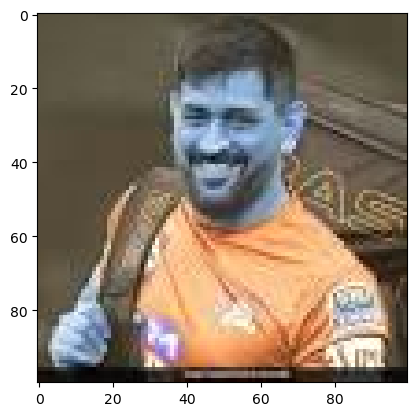

In [42]:
plt.imshow(img)

In [44]:
gray = cv2.cvtColor(img, cv2.COLOR_BGR2GRAY)
gray.shape

(100, 100)

In [45]:
gray

array([[76, 76, 77, ..., 72, 72, 73],
       [76, 77, 77, ..., 72, 72, 73],
       [77, 77, 77, ..., 72, 72, 72],
       ...,
       [ 6,  9,  8, ..., 13, 12, 12],
       [14, 16, 15, ...,  9,  9, 10],
       [14, 15, 15, ..., 11, 11, 12]], dtype=uint8)

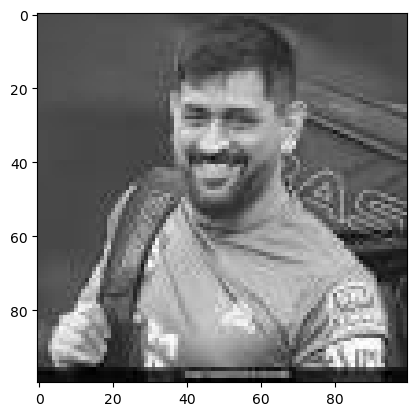

In [46]:
plt.imshow(gray, cmap='gray')

In [47]:
face_cascade = cv2.CascadeClassifier('./haarcascades/haarcascade_frontalface_default.xml')
eye_cascade  = cv2.CascadeClassifier('./haarcascades/haarcascade_eye.xml')

faces = face_cascade.detectMultiScale(gray,1.3,5)
faces

()

In [48]:
(x,y,w,h) = faces[0]

IndexError: tuple index out of range

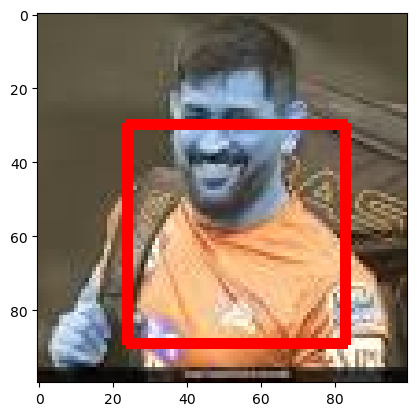

In [49]:
face_img = cv2.rectangle(img,(x,y),(x+w,y+h),(255,0,0),2)
plt.imshow(face_img)

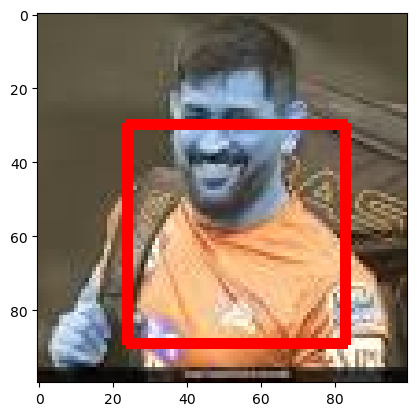

In [50]:
cv2.destroyAllWindows()
for(x,y,w,h) in faces:
    
    face_img = cv2.rectangle(img,(x,y),(x+w,y+h),(255,0,0),2)
    roi_gray = gray[y:y+h,x:x+w]
    roi_color = face_img[y:y+h,x:x+w]

    eyes = eye_cascade.detectMultiScale(roi_gray)
    for(ex,ey,ew,eh) in eyes:
        cv2.rectangle(roi_color,(ex,ey),(ex+ew,ey+eh),(0,255,0),2)

plt.figure()
plt.imshow(face_img,cmap='gray')
plt.show()

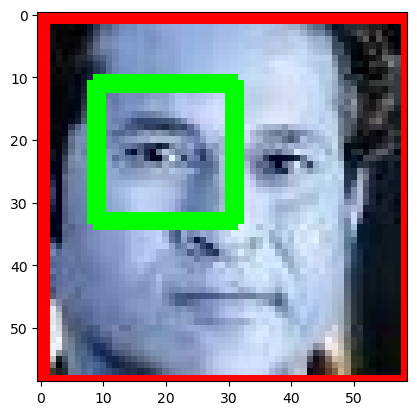

In [51]:
plt.imshow(roi_color,cmap='gray')

In [17]:
def face_detection(path):

    img  = cv2.imread(path)
    gray = cv2.cvtColor(img, cv2.COLOR_BGR2GRAY)
    faces = face_cascade.detectMultiScale(gray, 1.3, 5)

    for (x, y, w, h) in faces:
        roi_gray  = gray[y:y+h, x:x+w]
        roi_color = img[y:y+h, x:x+w]
        eyes = eye_cascade.detectMultiScale(roi_gray)

        if len(eyes) >= 1:
            return roi_color

    return None

In [24]:
cropped_img = face_detection('./test_images/sachin_85.jpg')

Face unrecognisable in  ./test_images/dhoni_17.jpg
Face unrecognisable in  ./test_images/dhoni_19.jpg
Face unrecognisable in  ./test_images/sachin_83.jpg
Face unrecognisable in  ./test_images/sachin_84.jpg
Face unrecognisable in  ./test_images/dhoni_18.jpg
Face unrecognisable in  ./test_images/dhoni_20.jpg
Face unrecognisable in  ./test_images/dhoni_21.jpg


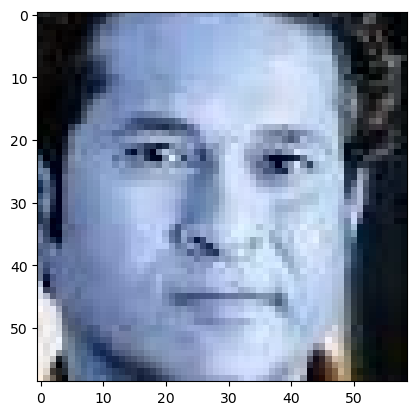

In [35]:
import os
path = './test_images'
for files in os.listdir(path):
    filename = os.path.join(path, files)
    img = face_detection(filename)

    if img is not None:
        plt.imshow(img)
    else:
        print("Face unrecognisable in ",filename)